In [1]:
import tensorflow as tf
import numpy as np

In [2]:
(trainX,trainY),(testX,testY)=tf.keras.datasets.mnist.load_data()

trainX=trainX/255.0
testX=testX/255.0

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
trainX=trainX.reshape(-1,28,28,1)
testX=testX.reshape(-1,28,28,1)

In [4]:
model=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(filters=32,kernel_size=2,strides=(2,2),activation='elu',input_shape=(28,28,1)),
                           tf.keras.layers.Conv2D(filters=64,kernel_size=2,strides=(2,2),activation='elu'),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(units=64),
                           tf.keras.layers.Dense(units=7*7*64,activation='elu'),
                           tf.keras.layers.Reshape(target_shape=(7,7,64)),
                           tf.keras.layers.Conv2DTranspose(filters=32,kernel_size=2,strides=(2,2),padding='same',activation='elu'),
                           tf.keras.layers.Conv2DTranspose(filters=1,kernel_size=2,strides=(2,2),padding='same',activation='sigmoid')
])

model.compile(optimizer='adam',loss='mse')

In [5]:
history=model.fit(trainX,trainX,epochs=20,batch_size=256)

Epoch 1/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0531
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0144
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0084
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0061
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0051
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0046
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0041
Epoch 8/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0038
Epoch 9/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0033
Epoch 10/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0031
Epoch 11/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0029
Epoch 12/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0028
Epoch 13/20
235/235 [====

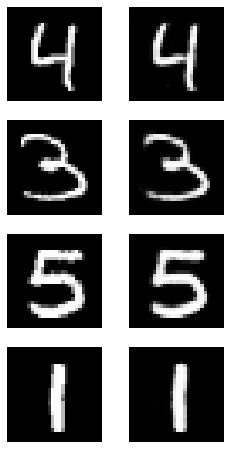

In [15]:
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(4,8))

for c in range(4):
    plt.subplot(4,2,c*2+1)
    idx=random.randint(0,testX.shape[0])
    plt.imshow(testX[idx].reshape(28,28),cmap='gray')
    plt.axis('off')
    
    plt.subplot(4,2,2*c+2)
    img=model.predict(np.expand_dims(testX[idx],axis=0))
    plt.imshow(img.reshape(28,28),cmap='gray')
    plt.axis('off')